In [1]:
import numpy as np
import pymc3 as pm
import bayesalpha as ba
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
n_time = 600
n_algos = 10

returns = np.random.randn(n_time, n_algos) / 1e3
signal = (np.random.randn(n_time, 2) > 0) * 2 - 1

In [22]:
returns = pd.DataFrame(returns)
# returns.colums = ['algo1', 'alg']....
returns.index = pd.DatetimeIndex(
    pd.date_range('2018-01-01', periods=n_time, freq='1B'))
signal = pd.DataFrame(signal)
signal.columns = ['VIX', 'HMM']
signal.index = returns.index

fit = ba.fit_population(returns, gains_factors=signal)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [gains_factor_algo_raw, gains_factor_algo_sd_log__, gains_time_raw, gains_time_sd_raw_log__, gains_time_sd_sd_log__, gains_time_alpha_log__, author_is, gains_raw, gains_mu, gains_sd_log__, log_vlt_time_raw, log_vlt_time_sd_log__, log_vlt_time_alpha_log__, log_vlt_mu]
100%|██████████| 1000/1000 [01:00<00:00, 16.54it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


/Users/adrianseyboldt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


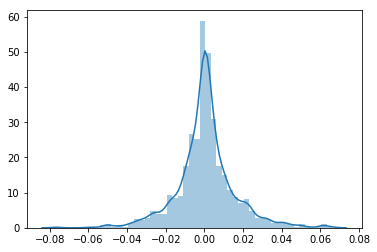

In [29]:
# How predictive is the signal of local non-annualized sharpe ratio?
sns.distplot(fit
    .trace
    .gains_factor_algo
    .sel(gains_factor='VIX', algo=2)
    .values.ravel())

In [24]:
fit.trace.gains_factor_algo.to_dataframe().head()

gains_factor_algo
chain sample gains_factor algo                   
0     0      VIX          0             -0.010585
                          1              0.002652
                          2             -0.012670
                          3              0.008918
                          4              0.011703

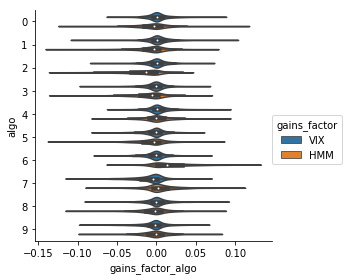

In [27]:
# Plot the posterior of the influence on the local non-annualized SR
sns.factorplot(x='gains_factor_algo', y='algo', hue='gains_factor',
               data=fit.trace.gains_factor_algo.to_dataframe().reset_index(),
               kind='violin', orient='h')

In [28]:
# What is the probability that predictor 1 is better than predictor 2 for a particular algo?
vix = fit.trace.gains_factor_algo.sel(gains_factor='VIX')
hmm = fit.trace.gains_factor_algo.sel(gains_factor='HMM')
(vix > hmm).mean(dim=('sample', 'chain')).to_pandas()

algo
0    0.597
1    0.627
2    0.773
3    0.607
4    0.538
5    0.567
6    0.227
7    0.276
8    0.538
9    0.479
dtype: float64